In [10]:
%cd /home/isaiah/code/NestedGraphs/

/home/isaiah/code/NestedGraphs


In [11]:
import glob
import torch 
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [12]:
b_embs = glob.glob('inputs/Sept23/benign/tgat_embgraph*')
m_embs = glob.glob('inputs/Sept23/mal/tgat_embgraph*')

bs = []
for b in b_embs:
    bs.append(torch.load(b))

ms = []
for m in m_embs:
    ms.append(torch.load(m))

b_x = torch.cat([b for b in bs])
m_x = torch.cat([m for m in ms])

print(b_x.size())
print(m_x.size())


torch.Size([77352, 128])
torch.Size([49125, 128])


In [13]:
from utils.graph_utils import propagate_labels

colors = []
for m in m_embs:
    with open(m.replace('tgat_emb','full_'), 'rb') as f:
        g = pickle.load(f)

    procs = (g.x[:,0] == 1).nonzero().squeeze(-1)
    y = propagate_labels(g,23)
    colors.append(y[procs])

colors = torch.cat(colors).clamp(0,1)

In [32]:
def plots_dots(b_x, m_x, title, colors):
    pca = PCA(n_components=2)
    bx = pca.fit_transform(b_x)
    x = pca.transform(m_x)

    plt.scatter(bx[:,0], bx[:,1], color='blue')
    plt.scatter(x[colors==0,0], x[colors==0,1], color='blue')
    plt.scatter(x[colors==1,0], x[colors==1,1], color='red')
    plt.title(title)
    plt.show()

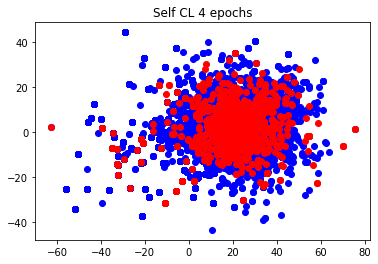

In [33]:
plots_dots(b_x.cpu(), m_x.cpu(), 'Self CL 4 epochs', colors)

In [34]:
def plots_dots_TSNE(b_x, m_x, title, colors):
    colors = torch.cat([torch.zeros(b_x.size(0)), colors])
    tsne = TSNE(n_components=2)
    x = tsne.fit_transform(torch.cat([b_x,m_x],dim=0))

    #plt.scatter(bx[:,0], bx[:,1], color='blue')
    plt.scatter(x[colors==0,0], x[colors==0,1], color='blue')
    plt.scatter(x[colors==1,0], x[colors==1,1], color='red')
    plt.title(title)
    plt.show()

In [35]:
plots_dots_TSNE(b_x.cpu(), m_x.cpu(), 'Self CL 100 Epochs', colors)

/home/isaiah/miniconda3/envs/gpu/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/isaiah/miniconda3/envs/gpu/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
